# Assignment

## Instructions

1.  **K-Means Clustering on Iris Dataset:**

    - Use the Iris dataset to perform K-Means clustering.
    - Determine the optimal number of clusters using the elbow method.




In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
sns.set_style('darkgrid')
%matplotlib inline

In [8]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

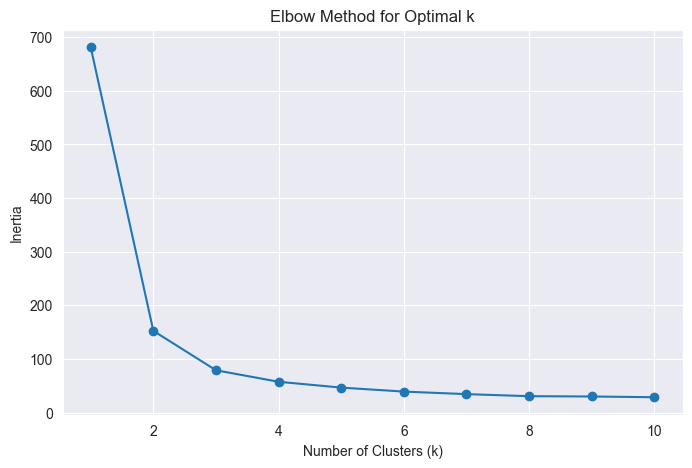

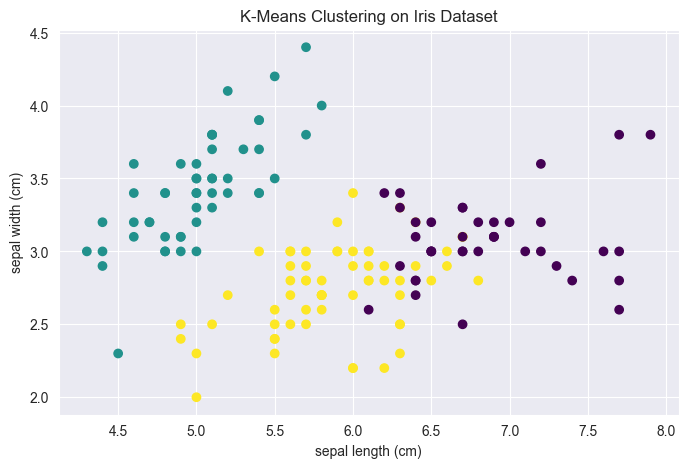

In [9]:
from sklearn.cluster import KMeans

# Determine optimal number of clusters using elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow method, optimal k is typically 3 for Iris dataset
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

# Visualize clusters (using first two features for simplicity)
plt.figure(figsize=(8, 5))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

2.  **DBSCAN on Iris Dataset:**
    - Apply DBSCAN clustering on the Iris dataset.
    - Experiment with different values for `eps` and `min_samples` to find meaningful clusters.


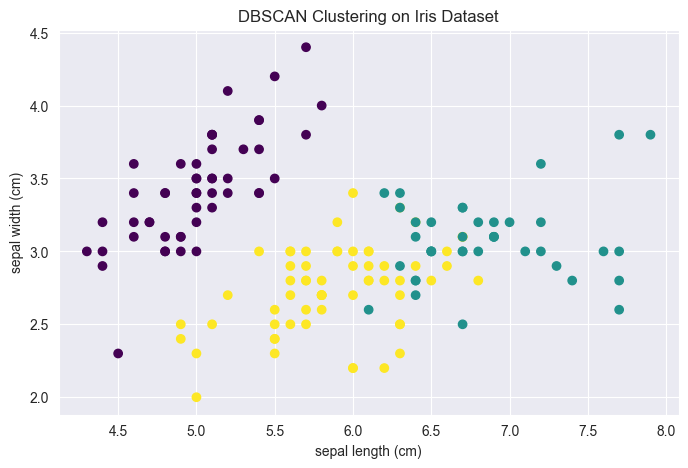

In [16]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN with initial parameters (experiment with eps and min_samples)
dbscan = DBSCAN(eps=1, min_samples=3)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df.iloc[:, :-1])  # Exclude the KMeans Cluster column

# Visualize DBSCAN clusters (using first two features)
plt.figure(figsize=(8, 5))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['DBSCAN_Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering on Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

# Note: Adjust eps (e.g., 0.3 to 1.0) and min_samples (e.g., 3 to 10) for different results